<a href="https://colab.research.google.com/github/rifadukrifat-0035/Test-class/blob/main/M_4_C_2_practice_Model_Evaluation_in_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

* pandas (pd) → for data loading, cleaning, and handling in tabular form.

* numpy (np) → for numerical computations (arrays, math functions).

* train_test_split → splits dataset into training and testing sets.

* LinearRegression, Ridge, Lasso → regression models (basic + regularized).

* metrics (MSE, MAE, R²) → used to evaluate model performance.


In [ ]:
#impor libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Load Dataset**

* data_url →
This is the link to the Boston Housing dataset stored on GitHub.
Instead of downloading manually, we load it directly into pandas.

* columns = [...] →
The dataset doesn’t have column headers, only raw numbers.
So we explicitly provide the column names for readability and analysis.
Example:


1.   CRIM = crime rate
2.   RM = average number of rooms per dwelling
3.   MEDV = median value of homes (our target)



In [ ]:
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"

In [ ]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
df = pd.read_csv(data_url, delim_whitespace=True, names=columns)

/tmp/ipython-input-4120567973.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_url, delim_whitespace=True, names=columns)


# **Split into Train, Validation, Test**


In [ ]:
#Split into Train (70%), Validation (20%), Test (10%)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train Models on Train set**

In [ ]:
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

# **Evaluate Models on Validation and Test**

In [ ]:
models = {'Linear Regression': lin_reg, 'Ridge Regression': ridge_reg, 'Lasso Regression': lasso_reg}

results = []

for name, model in models.items():
    # Validation performance
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Test performance
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    results.append([
        name,
        val_mse, val_rmse, val_r2, val_mae,
        test_mse, test_rmse, test_r2, test_mae
    ])

# **Comparison Table**

In [ ]:
results_df = pd.DataFrame(results, columns=[
    'Model',
    'Val MSE', 'Val RMSE', 'Val R²', 'Val MAE',
    'Test MSE', 'Test RMSE', 'Test R²', 'Test MAE'
])

print("\nComparison of Regression Models (Validation vs Test):")
print(results_df)


Comparison of Regression Models (Validation vs Test):
               Model    Val MSE  Val RMSE    Val R²   Val MAE   Test MSE  \
0  Linear Regression  23.932199  4.892055  0.708809  3.390889  14.836429   
1   Ridge Regression  24.477776  4.947502  0.702171  3.369132  14.703223   
2   Lasso Regression  26.700124  5.167216  0.675131  3.465480  15.511980   

   Test RMSE   Test R²  Test MAE  
0   3.851809  0.762367  2.821688  
1   3.834478  0.764501  2.756015  
2   3.938525  0.751547  2.850868  


ValueError: x and y must be the same size

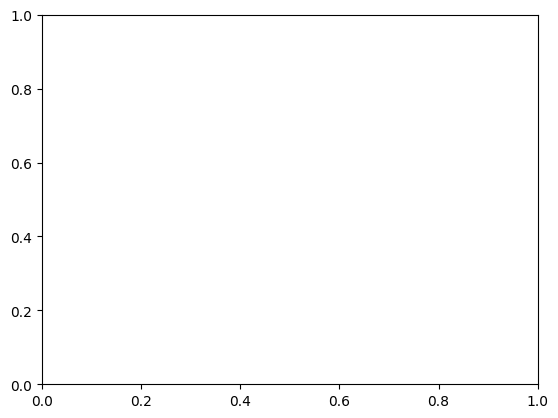

In [ ]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dummy Dataset')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

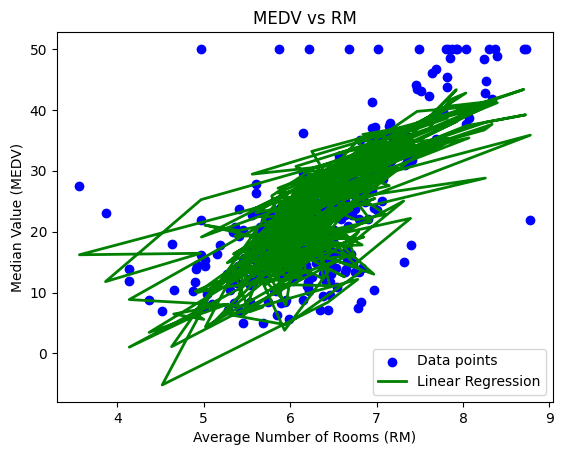

In [ ]:
# Get predictions from the linear regression model for the entire dataset
y_pred = lin_reg.predict(x)

plt.scatter(x['RM'], y, color='blue', label='Data points')
plt.plot(x['RM'], y_pred, color='green', linewidth=2, label='Linear Regression')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV)')
plt.title('MEDV vs RM')
plt.legend()
plt.show()